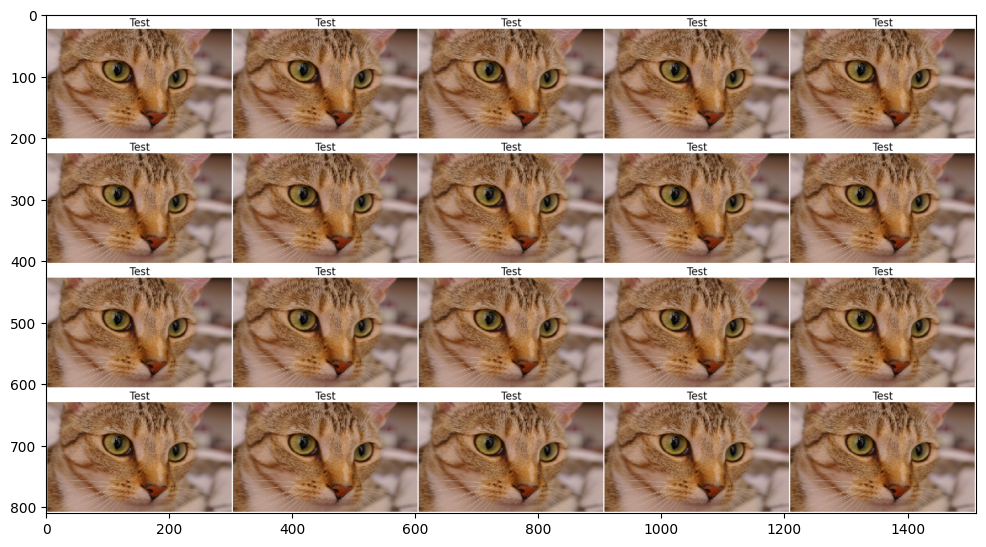

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import torchvision
import torch

def create_container(img, text, container_shape, text_height=12, upper_pad=5, lower_pad=5):

    if img.ndim==2:
        img = np.tile(img, (3,1,1)).transpose(1,2,0)
    elif img.ndim==3 and img.shape[2]==1:
        img = np.tile(img, (1,1,3))

    text_area_height = text_height + upper_pad + lower_pad
    interpolation_shape = (container_shape[0]-text_area_height, container_shape[1])
    img_rs = skimage.transform.resize(img, interpolation_shape, order=0, preserve_range=True).astype(np.uint8)

    container_bg = np.full((container_shape[0], container_shape[1], 3), 255, dtype=np.uint8)
    container_bg[text_area_height:] = img_rs

    if text is not None:
        xtext = 0.5
        y = container_shape[0]-1-text_area_height+lower_pad
        ytext = pix_to_ax((y, 0), container_shape)[1]

    fig = plt.figure()
    figimage = fig.figimage(container_bg, resize=True)
    if text is not None:
        fig.text(xtext, ytext, text, c='k', fontsize=text_height, ha='center', va='baseline')
    fig.canvas.draw()
    container = np.asarray(fig.canvas.renderer.buffer_rgba())[:,:,:3]
    plt.close(fig)

    return container

def ax_to_pix(point, img_shape):
    
    x, y = point
    r = int(y*img_shape[0])
    c = int(x*img_shape[1])
    if r==img_shape[0]:
        r -= 1
    if c==img_shape[1]:
        c -= 1
    
    return r, c

def pix_to_ax(point, img_shape):
    
    r, c = point
    y = (r+0.5)/img_shape[0]
    x = (c+0.5)/img_shape[1]
    
    return x, y

def create_grid(tensors, nrow, container_shape, texts=None, padding=2, text_height=12):

    if texts is None:
        text_height = 0
        upper_pad = 0
        lower_pad = 0
        texts = [None]*len(tensors)
    else:
        upper_pad=5
        lower_pad=5

    containers = []
    for tensor, text in zip(tensors, texts):
        # Change channel dimension
        img = np.array(tensor).transpose(1, 2, 0)
        container = create_container(img, text, container_shape, text_height, upper_pad, lower_pad)
        # Change channel dimension back
        containers.append(torch.from_numpy(container.transpose(2, 0, 1)))

    grid = torchvision.utils.make_grid(containers, nrow=nrow, padding=padding, pad_value=255).permute(1, 2, 0)

    return grid

img = skimage.data.cat()
container_shape = (200,300)

tensors = []
texts = []
for i in range(20):
    tensors.append(torch.from_numpy(img.transpose(2, 0, 1)))
    texts.append('Test')

grid = create_grid(tensors, 5, container_shape, texts)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid)


In [156]:
img.shape

(300, 451, 3)

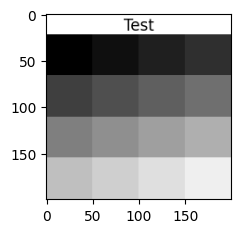

In [133]:
img = np.arange(4*4).reshape(4,4)
img = (255*img/16).astype(np.uint8)

container = create_container(img, 'Test', container_shape)

fig, ax = plt.subplots()
ax.imshow(container)

In [131]:
container

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]